In [11]:
import json
import pandas as pd
from plotnine import *

In [101]:
with open('data/oew_least_3vault.json') as f:
    data = json.load(f)

In [4]:
data['settings']

{'members': {'Kim': 'Priest',
  'Ivan': 'Hunter',
  'Maelz': 'Shaman',
  'Vaelldur': 'DemonHunter',
  'Atela': 'DeathKnight',
  'Gucci': 'Warlock',
  'Divisive': 'Druid',
  'Tendronas': 'DemonHunter',
  'Nanuss': 'Warrior',
  'Flemingo': 'Druid',
  'Eisenpelz': 'Monk',
  'Traltixx': 'Hunter',
  'Velium': 'Monk',
  'Kadmix': 'Priest',
  'Nosimage': 'Mage',
  'Wings': 'Rogue',
  'Zuko': 'Mage',
  'Kap': 'Hunter',
  'Keegan': 'Paladin',
  'Sokchoy': 'Priest',
  'Rav': 'Rogue',
  'Altenna': 'Shaman',
  'Heiji': 'Priest',
  'Jop': 'Druid'},
 'clears_per_week': ['Normal', 'Heroic'],
 'mythic_kills': [3, 4, 5, 6, 7, 7, 7, 8],
 'mythic_first_slot': 'Gloves',
 'num_extra_vault_items': 3,
 'trading_rule': {'target': 'LeastPieces'},
 'num_samples': 100000}

In [9]:
pct_4pc = pd.DataFrame.from_records([sample['pct_4pc'] for sample in data['samples']]).fillna(1.0)

In [25]:
pct_4pc_long = pct_4pc.melt(value_vars=pct_4pc.columns)

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


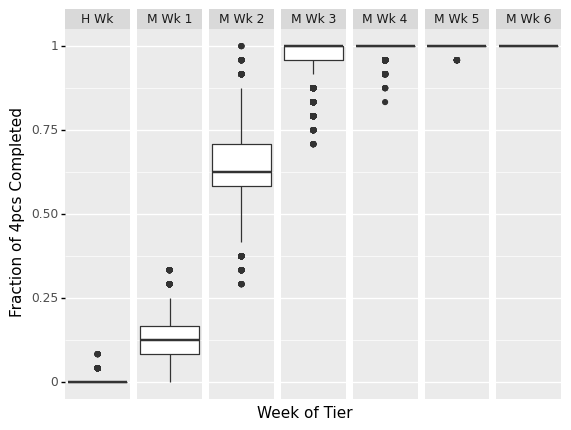

<ggplot: (8744669857515)>

In [51]:
ggplot(pct_4pc_long, aes(x=1, y='value')) \
    + stat_boxplot() \
    + facet_grid('~ variable', labeller=lambda wk: f'M Wk {wk}' if wk != '0' else 'H Wk') \
    + theme(axis_text_x=element_blank(), 
            axis_ticks_major_x=element_blank(),
            panel_grid_major_x=element_blank(), 
            panel_grid_minor_x=element_blank()) \
    + xlab('Week of Tier') \
    + ylab('Fraction of 4pcs Completed')

In [75]:
def settings_title(data):
    settings = data['settings']
    clears = ' and '.join(settings['clears_per_week'])
    rule = settings['trading_rule']['target']
    vault = settings['num_extra_vault_items']
    return f'Results for {rule} (Non-Raid Vault: {vault}, Clearing {clears} every week)'

In [94]:
def chart_weeks(path, field, ylabel, stat=stat_boxplot, navalue=1.0, ylimits=ylim(0,1), title=settings_title):
    with open(path) as f:
        data = json.load(f)
    df = pd.DataFrame.from_records(sample[field] for sample in data['samples']).fillna(navalue)
    df = df.melt(value_vars=df.columns)
    
    chart = ggplot(df, aes(x=1, y='value')) \
        + stat() \
        + facet_grid('~ variable', labeller=lambda wk: f'M Wk {wk}' if wk != '0' else 'H Wk') \
        + theme_bw() \
        + theme(axis_text_x=element_blank(), 
                axis_ticks_major_x=element_blank(),
                panel_grid_major_x=element_blank(), 
                panel_grid_minor_x=element_blank()) \
        + xlab('Week of Tier') \
        + ylab(ylabel) + ylimits + ggtitle(settings_title(data))
    
    return chart

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


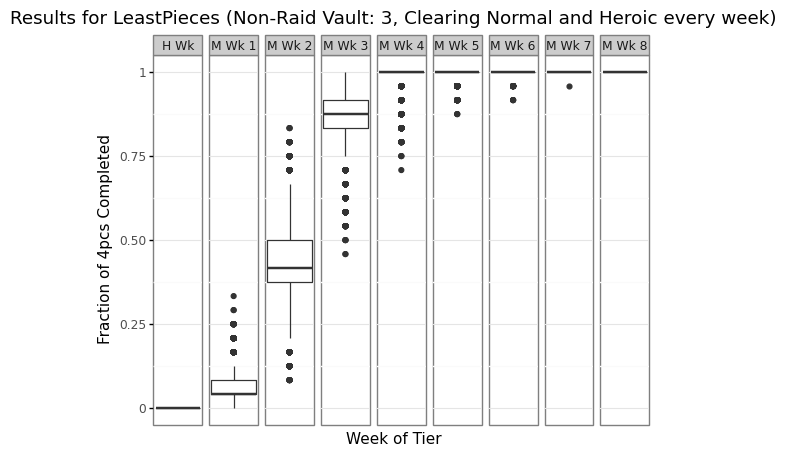

<ggplot: (8744465568097)>

In [103]:
chart_weeks('data/oew_least_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


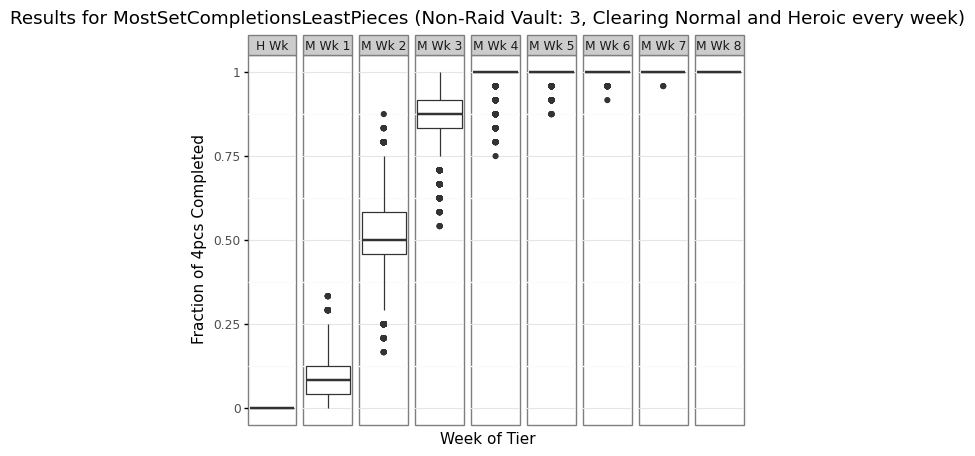

<ggplot: (8744674510713)>

In [113]:
chart_weeks('data/oew_leastset_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


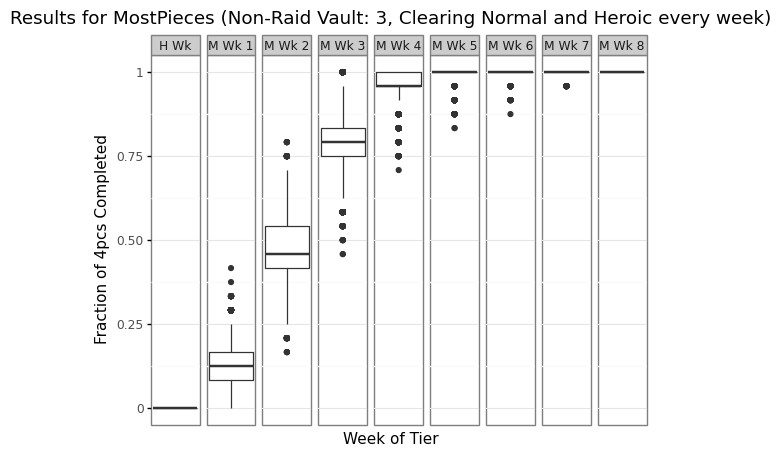

<ggplot: (8744510602244)>

In [104]:
chart_weeks('data/oew_most_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


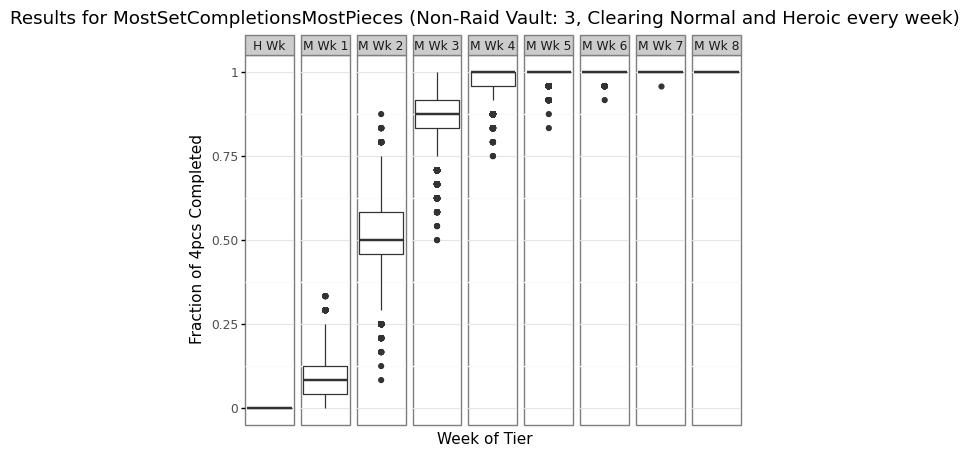

<ggplot: (8744555801706)>

In [114]:
chart_weeks('data/oew_mostset_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


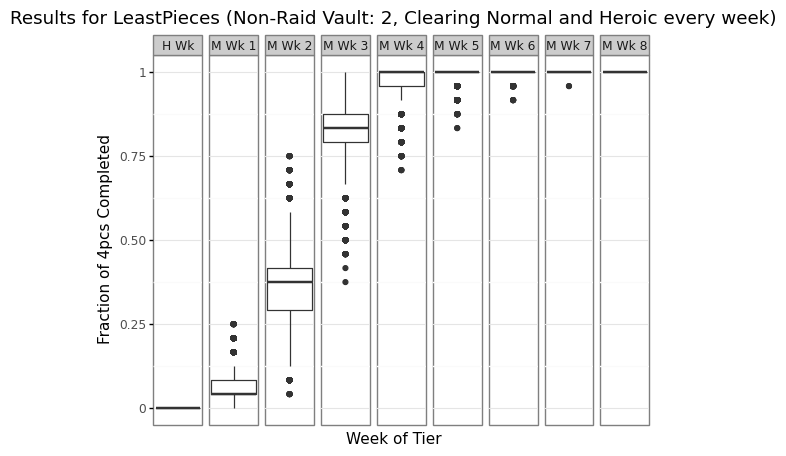

<ggplot: (8744526114015)>

In [105]:
chart_weeks('data/oew_least_2vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


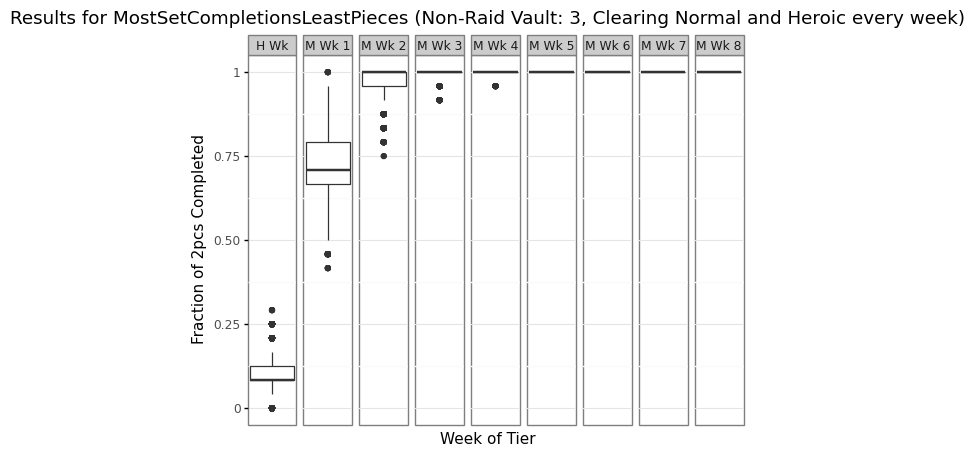

<ggplot: (8744378154445)>

In [115]:
chart_weeks('data/oew_leastset_3vault.json', 'pct_2pc', 'Fraction of 2pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


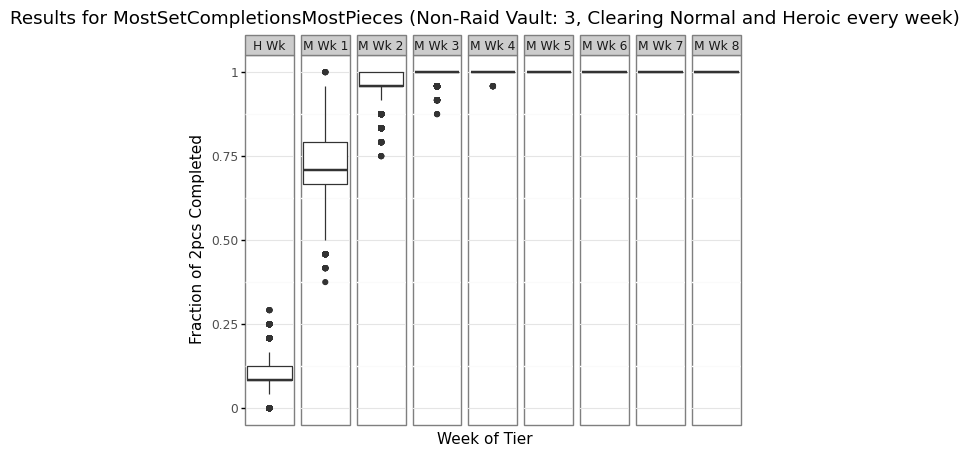

<ggplot: (8744370015609)>

In [116]:
chart_weeks('data/oew_mostset_3vault.json', 'pct_2pc', 'Fraction of 2pcs Completed')